# Projet n°6: Classifiez automatiquement des biens de consommations 
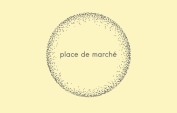   
### CNN


In [1]:
#!pip install keras

In [2]:
#!pip install tensorflow

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras import Model
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras import layers

from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf

import cv2
import os

import pandas as pd
from matplotlib.image import imread

import numpy as np

In [4]:
path = "Images/"

In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    '''redimensionnement des images:
    * filtre gaussian
    * égalisation de l'histogramme
    * redimensionnement
    prend un entrée le chemin vers l'image et en sortie la matrice np.array de l'image traitée
    '''    
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

In [7]:
def drop_col(df):
    df.drop(columns=['product_name', 'description', 'brand', 'words'], inplace=True)
    return df

In [8]:
train = drop_col(train)
test = drop_col(test)

In [9]:
le = LabelEncoder()

In [10]:
labels = ['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers']
img_size = 224

In [11]:
def build_data(df):
    data = []
    for label in labels: 
        class_num = labels.index(label)
        for image_num in range(len(df["image"])) :
            if df["categ_principale"].iloc[image_num] == label :
                image = cv2.imread(path+df["image"].iloc[image_num])
                image = cv2.resize(image,dsize=(img_size,img_size))
                image = cv2.GaussianBlur(image, (3,3), 0)
                
                data.append([image, class_num])
    return np.array(data)

In [12]:
train = build_data(train)
test = build_data(test)

C:\Users\Mathieu\AppData\Local\Temp/ipykernel_11904/1607074055.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [13]:
X_train = []
y_train = []
X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)

# Normalize the data
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255

X_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

X_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [14]:
model = Sequential()
model.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=(img_size,img_size,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())


model.add(Flatten())
model.add(Dense(7, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [15]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = opt ,loss = tf.keras.losses.SparseCategoricalCrossentropy() , metrics = ['accuracy'])

In [16]:
history = model.fit(X_train,y_train, epochs = 50 , validation_data = (X_test, y_test))

Epoch 1/50
25/25 [==============================] - 27s 1s/step - loss: 1.9428 - accuracy: 0.1842 - val_loss: 1.8527 - val_accuracy: 0.2319
Epoch 2/50
25/25 [==============================] - 26s 1s/step - loss: 1.8182 - accuracy: 0.3050 - val_loss: 1.7571 - val_accuracy: 0.2776
Epoch 3/50
25/25 [==============================] - 26s 1s/step - loss: 1.6571 - accuracy: 0.3977 - val_loss: 1.5923 - val_accuracy: 0.4144
Epoch 4/50
25/25 [==============================] - 27s 1s/step - loss: 1.4866 - accuracy: 0.4854 - val_loss: 1.4208 - val_accuracy: 0.4867
Epoch 5/50
25/25 [==============================] - 26s 1s/step - loss: 1.3416 - accuracy: 0.5388 - val_loss: 1.4148 - val_accuracy: 0.4449
Epoch 6/50
25/25 [==============================] - 27s 1s/step - loss: 1.2796 - accuracy: 0.5540 - val_loss: 1.2545 - val_accuracy: 0.5779
Epoch 7/50
25/25 [==============================] - 27s 1s/step - loss: 1.1404 - accuracy: 0.6048 - val_loss: 1.1430 - val_accuracy: 0.6274
Epoch 8/50
25/25 [==

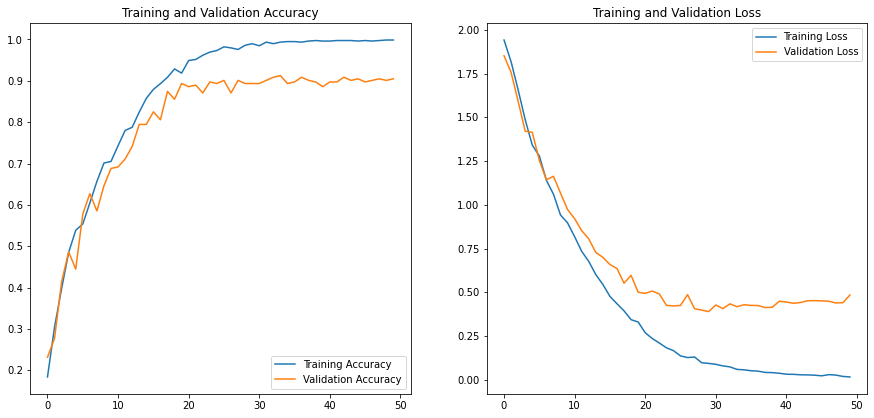

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("curve.png", transparent=True)
plt.show()

In [18]:
predictions_test = model.predict(X_test)

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test)
test_acc

9/9 [==============================] - 2s 209ms/step - loss: 0.4836 - accuracy: 0.9049


0.9049429893493652

In [20]:
# save model and architecture to single file
model.save("model.h5")

In [21]:
results = np.zeros((0,))
for i in range(predictions_test.shape[0]):
    results = np.append(results, np.argmax(predictions_test[i]))
results

array([0., 0., 0., 0., 0., 0., 5., 0., 0., 0., 0., 0., 5., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 0., 0., 3., 0., 4., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 0., 3., 3., 3., 3., 0., 3.,
       0., 5., 3., 3., 3., 3., 0., 3., 3., 3., 3., 3., 3., 4., 3., 3., 3.,
       3., 3., 3., 4., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 2., 4., 4., 5., 5., 5., 5., 5., 3.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 0., 5., 5., 0., 5., 5.,
       5., 5., 5., 5., 5.

In [22]:
print(classification_report(y_test, results, target_names=labels))

                            precision    recall  f1-score   support

           Home Furnishing       0.79      0.90      0.84        50
                 Baby Care       1.00      0.88      0.94        25
                   Watches       0.97      1.00      0.98        31
Home Decor & Festive Needs       0.94      0.81      0.87        36
          Kitchen & Dining       0.86      0.97      0.92        39
  Beauty and Personal Care       0.94      0.94      0.94        47
                 Computers       0.97      0.83      0.89        35

                  accuracy                           0.90       263
                 macro avg       0.92      0.90      0.91       263
              weighted avg       0.91      0.90      0.91       263



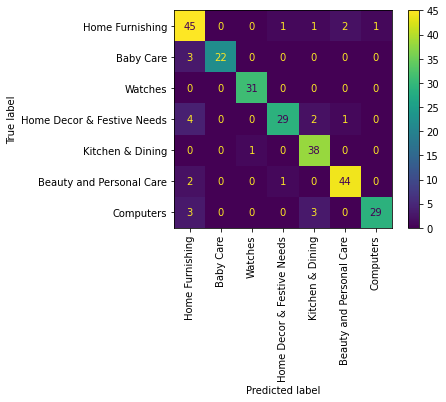

In [23]:
cm = confusion_matrix(y_test, results)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=labels)
disp.plot()
disp.ax_.tick_params(axis='x', labelrotation=90)
plt.savefig("cm_cnn.png", bbox_inches="tight", transparent=True)
plt.show()

### Surapprentissage
#### Correction en appliquant l'augmentation des données et dropout (abandon)

In [24]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_size,
                                  img_size,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [25]:
model_augmentation = Sequential()

model_augmentation.add(data_augmentation)
model_augmentation.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=(224,224,3)))
model_augmentation.add(MaxPool2D())

model_augmentation.add(Conv2D(32, 3, padding="same", activation="relu"))
model_augmentation.add(MaxPool2D())

model_augmentation.add(Conv2D(64, 3, padding="same", activation="relu"))
model_augmentation.add(MaxPool2D())


model_augmentation.add(Flatten())
model_augmentation.add(Dense(7, activation="softmax"))

model_augmentation.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)       

In [26]:
model_augmentation.compile(optimizer = opt ,loss = tf.keras.losses.SparseCategoricalCrossentropy() , metrics = ['accuracy'])

In [27]:
history_overfit = model_augmentation.fit(X_train,y_train,epochs=50, validation_data = (X_test, y_test))

Epoch 1/50
25/25 [==============================] - 30s 1s/step - loss: 1.9900 - accuracy: 0.1677 - val_loss: 1.9120 - val_accuracy: 0.2700
Epoch 2/50
25/25 [==============================] - 29s 1s/step - loss: 1.8817 - accuracy: 0.2376 - val_loss: 1.7937 - val_accuracy: 0.3498
Epoch 3/50
25/25 [==============================] - 29s 1s/step - loss: 1.7553 - accuracy: 0.3291 - val_loss: 1.6850 - val_accuracy: 0.3726
Epoch 4/50
25/25 [==============================] - 29s 1s/step - loss: 1.6597 - accuracy: 0.3787 - val_loss: 1.7089 - val_accuracy: 0.3612
Epoch 5/50
25/25 [==============================] - 29s 1s/step - loss: 1.6069 - accuracy: 0.4015 - val_loss: 1.5614 - val_accuracy: 0.4335
Epoch 6/50
25/25 [==============================] - 29s 1s/step - loss: 1.5096 - accuracy: 0.4536 - val_loss: 1.4982 - val_accuracy: 0.4639
Epoch 7/50
25/25 [==============================] - 29s 1s/step - loss: 1.4770 - accuracy: 0.4676 - val_loss: 1.4401 - val_accuracy: 0.4715
Epoch 8/50
25/25 [==

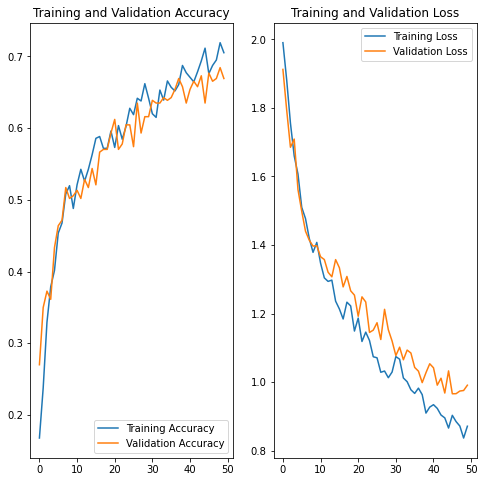

In [28]:
epochs=50
acc = history_overfit.history['accuracy']
val_acc = history_overfit.history['val_accuracy']

loss = history_overfit.history['loss']
val_loss = history_overfit.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
results_augm = model_augmentation.predict(X_test)

In [30]:
y_pred_cnn = []
for i in range(results_augm.shape[0]):
    y_pred_cnn.append(np.argmax(results_augm[i]))
np.array(y_pred_cnn)

array([0, 2, 3, 1, 0, 0, 3, 4, 0, 1, 1, 3, 3, 1, 0, 3, 0, 0, 6, 0, 0, 3,
       0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 4, 5, 0, 0, 3, 0, 0, 0,
       6, 0, 0, 0, 0, 3, 0, 1, 6, 3, 2, 4, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 4, 6, 1, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 6, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 6, 0, 3, 3, 1, 4, 5, 3,
       3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 5, 4, 4, 4, 3, 4, 6, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 1,
       5, 4, 6, 4, 4, 2, 3, 5, 3, 5, 3, 0, 5, 5, 2, 3, 3, 5, 5, 6, 3, 5,
       5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 1, 2, 2, 5, 5, 4, 0, 2, 5, 3, 1, 6,
       5, 3, 5, 5, 5, 2, 5, 5, 3, 5, 6, 2, 6, 6, 6, 6, 6, 2, 6, 4, 6, 4,
       6, 6, 6, 3, 6, 6, 6, 4, 4, 6, 6, 6, 3, 6, 6, 4, 4, 6, 6, 6, 6],
      dtype=int64)

In [31]:
# Evaluation du modèle sur le test set en utilisant `evaluate`
print("Evaluation sur le test set")
results_eval = model_augmentation.evaluate(X_test, y_test, batch_size=32)
print("test loss, test acc:", results_eval)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Predictions sur un échantillon de  3 exemples")
predictions_sample = model_augmentation.predict(X_test[:3])
print("Predictions shape:", predictions_sample.shape)
print("Predictions sample:", 
      np.argmax(predictions_sample[0]),
      np.argmax(predictions_sample[1]),
      np.argmax(predictions_sample[2]))
print("Vrais resultats", y_test[:3])

Evaluate on test data
9/9 [==============================] - 3s 290ms/step - loss: 0.9909 - accuracy: 0.6692
test loss, test acc: [0.9909383654594421, 0.6692014932632446]
Generate predictions for 3 samples
predictions shape: (3, 7)
predictions sample: 0 2 3
true results [0 0 0]


In [32]:
print(classification_report(y_test, y_pred_cnn, target_names=labels))

                            precision    recall  f1-score   support

           Home Furnishing       0.83      0.58      0.68        50
                 Baby Care       0.57      0.52      0.54        25
                   Watches       0.66      0.94      0.77        31
Home Decor & Festive Needs       0.52      0.72      0.60        36
          Kitchen & Dining       0.65      0.79      0.71        39
  Beauty and Personal Care       0.83      0.53      0.65        47
                 Computers       0.70      0.66      0.68        35

                  accuracy                           0.67       263
                 macro avg       0.68      0.68      0.66       263
              weighted avg       0.70      0.67      0.67       263



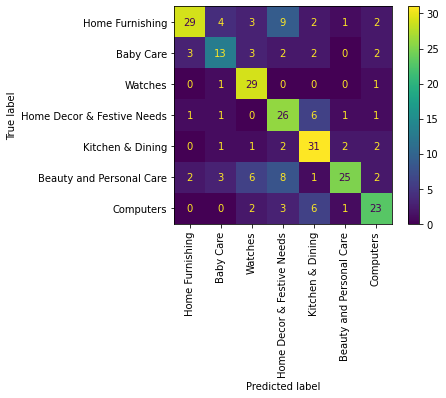

In [33]:
cm = confusion_matrix(y_test, y_pred_cnn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=labels)
disp.plot()
disp.ax_.tick_params(axis='x', labelrotation=90)
plt.show()

### Tentatives avec images inédites
On essaye des images que le modèle n'a jamais vu

In [60]:
def predict_new_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img,dsize=(img_size,img_size))
    img = np.array(img) / 255
    img = img.reshape(1, img_size, img_size, -1)
    pred = model.predict(img)
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(pred)], 100 * np.max(pred)))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [36]:
predict_new_image("usb.jpg")

(1, 7)
This image most likely belongs to Computers with a 81.81 percent confidence.


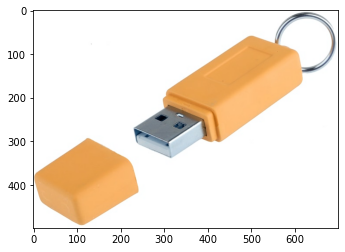

In [37]:
plt.imshow(cv2.imread("usb.jpg"))

In [62]:
predict_new_image("creme2.jpg")

This image most likely belongs to Kitchen & Dining with a 64.75 percent confidence.


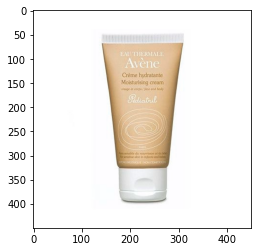

In [61]:
plt.imshow(cv2.imread("creme2.jpg"))

In [40]:
predict_new_image("cadre.jpg")

(1, 7)
This image most likely belongs to Home Decor & Festive Needs with a 98.16 percent confidence.


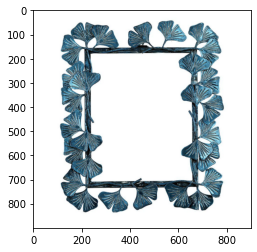

In [41]:
plt.imshow(cv2.imread("cadre.jpg"))

In [58]:
predict_new_image("dip.jpg")

(1, 7)
This image most likely belongs to Baby Care with a 55.74 percent confidence.


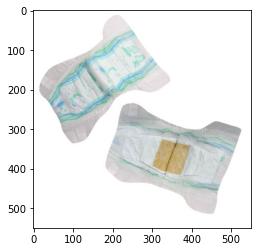

In [59]:
plt.imshow(cv2.imread("dip.jpg"))

In [44]:
predict_new_image("watch.jpg")

(1, 7)
This image most likely belongs to Watches with a 99.51 percent confidence.


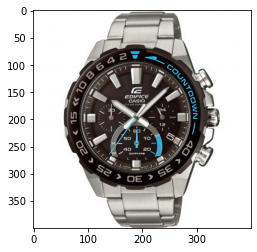

In [45]:
plt.imshow(cv2.imread("watch.jpg"))

### Transfer Learning

In [46]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (img_size, img_size, 3), include_top = False, weights = "imagenet")
base_model.trainable = False

In [47]:
model_tl = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(7, activation="softmax")                                     
                                ])

In [48]:
model_tl.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 7)                 8967      
                                                                 
Total params: 2,266,951
Trainable params: 8,967
Non-trainable params: 2,257,984
_________________________________________________________________


In [49]:
X_train.shape

(787, 224, 224, 3)

In [50]:
base_learning_rate = 0.0001
model_tl.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history_tl = model_tl.fit(X_train,y_train, validation_data = (X_test, y_test))

C:\Users\Mathieu\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 34s 1s/step - loss: 2.1006 - accuracy: 0.2262 - val_loss: 1.8537 - val_accuracy: 0.3308


----

In [51]:
model_vgg16 = VGG16() # Création du modèle VGG-16 implementé par Keras

In [52]:
y_pred_vgg = model_vgg16.predict(X_test)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)

In [53]:
img = load_img('watch.jpg', target_size=(224, 224))  # Charger l'image
img = img_to_array(img)  # Convertir en tableau numpy
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))  # Créer la collection d'images (un seul échantillon)
img = preprocess_input(img)  # Prétraiter l'image comme le veut VGG-16
y = model_vgg16.predict(img)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)

In [54]:
# Afficher les 3 classes les plus probables
print('Top 3 :', decode_predictions(y, top=3)[0])

Top 3 : [('n04328186', 'stopwatch', 0.27906066), ('n02708093', 'analog_clock', 0.23668262), ('n03706229', 'magnetic_compass', 0.22668785)]


In [55]:
y.shape

(1, 1000)

In [56]:
y_pred_vgg = []
for i in range(y.shape[0]):
    y_pred_vgg.append(np.argmax(y[i]))
y_pred_vgg = np.array(y_pred_vgg)